In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
# load data
data_train = pd.read_csv('./data/titanic/train.csv')

# remove the unnecessary columns
data_train.drop(['PassengerId', 'Name', 'Cabin', 'Embarked', 'Ticket'], axis=1, inplace=True)

# remove the rows with missing values
data_train.dropna(inplace=True)

data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
889,1,1,male,26.0,0,0,30.0000


In [3]:
# encode the 'Sex' column
data_train = pd.get_dummies(data_train, columns=['Sex'], drop_first=True)

data_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
889,1,1,26.0,0,0,30.0000,1


In [4]:
# describe the features (X) and the target variable (y)
X = data_train[['Sex_male', 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch']]
y = data_train['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Choose the value of K
k = 8
# Create a KNN classifier with the chosen K value
knn = KNeighborsClassifier(n_neighbors=k)

# Train the KNN model on the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Evaluate the model's accuracy
accuracy = (y_pred == y_test).mean()
print(f"Accuracy of KNN with K={k}: {accuracy:.2%}")

Accuracy of KNN with K=8: 79.72%


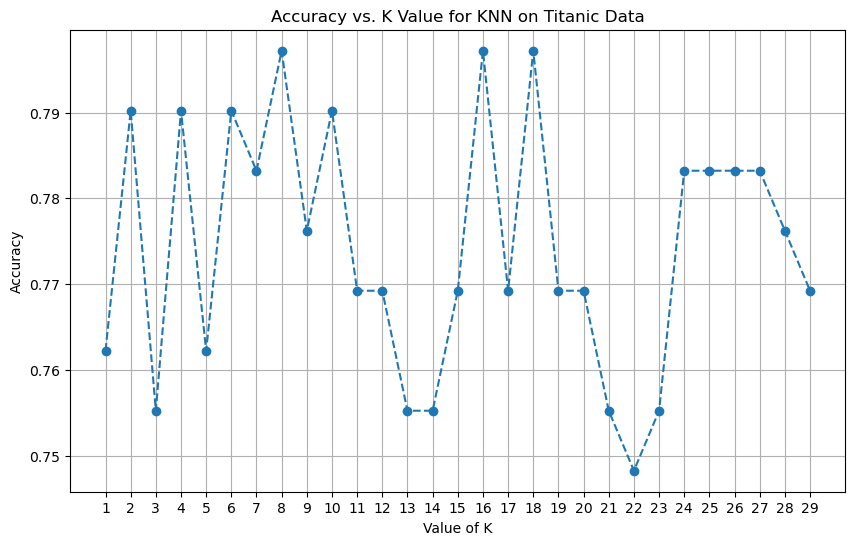

(8, 0.7972027972027972)

In [6]:
# Initialize variables to store results
k_values = range(1, 30)
accuracies = []

# Loop over various k values and record accuracy
for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    y_pred_temp = knn_temp.predict(X_test)
    accuracy_temp = accuracy_score(y_test, y_pred_temp)
    accuracies.append(accuracy_temp)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K Value for KNN on Titanic Data')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Displaying the k value that resulted in the highest accuracy
best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
best_k, best_accuracy